# 1.3 Additional exercises

In this notebook, we explore different coding examples and exercises to become more familiar with PyTorch. Feel free to choose those that you find most interesting.

<!--
- [Gradients](#Gradients)
- [More on tensor operations](#More-on-tensor-operations)
- [Linear regression](#Linear-regression)
- [Save and load models](#Save-and-load-models)
-->

## Gradients

Autograd, short for automatic differentiation, is a fundamental concept in PyTorch that enables automatic computation of gradients for tensor operations. It is a key component of PyTorch's dynamic computational graph, allowing users to easily compute gradients with respect to input tensors.

**Exercise 1**: Explain the code below. What does each line of code do?

In [ ]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([2.0], requires_grad=True)

# Perform a mathematical operation
y = x**2 + 3*x + 1

# Compute the gradient
y.backward()

# Access the gradient
gradient = x.grad

print("Original Tensor (x):", x.item())
print("Result of the Operation (y):", y.item())
print("Gradient with respect to x:", gradient.item())

Original Tensor (x): 2.0
Result of the Operation (y): 11.0
Gradient with respect to x: 7.0


**Exercise 2**: Compute the gradient of $y = x^2 + 3\cdot x + 1$ for a whole range of values of x (from -5 to 5) and plot your results.

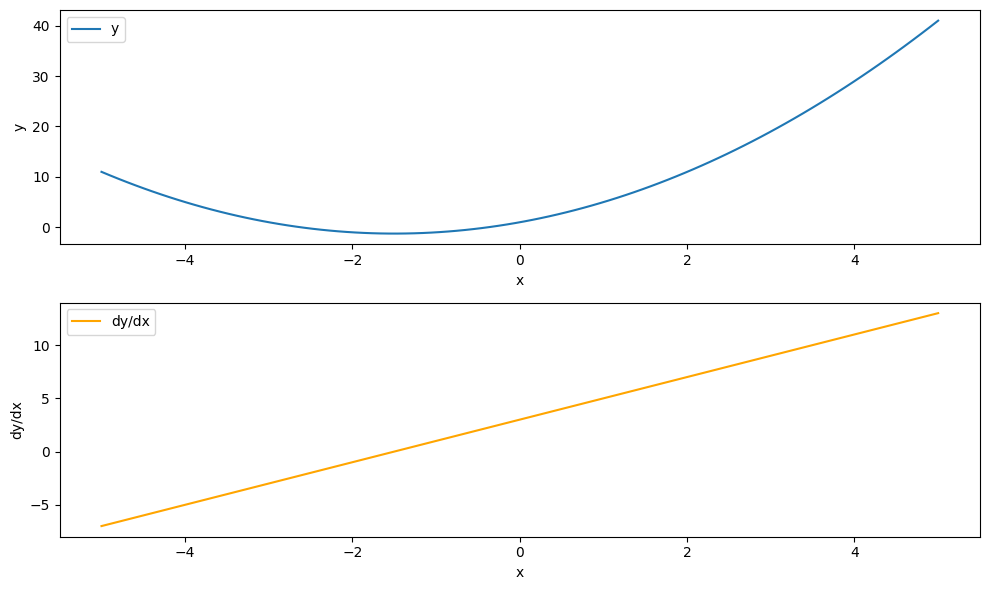

In [ ]:
import torch
import matplotlib.pyplot as plt

# Create a tensor with requires_grad=True
x_values = torch.linspace(-5, 5, 100, requires_grad=True)

# Compute y, compute gradients and plot both y and dy/dx as a function of x.

y = x_values**2 + 3*x_values + 1

# Compute the gradients
# Step 1: Backpropagate with respect to x_values
y.backward(torch.ones_like(x_values))

# Step 2: Extract the gradient
dy_dx = x_values.grad

# Plot y and dy/dx
plt.figure(figsize=(10, 6))

# Plot y as a function of x
plt.subplot(2, 1, 1)
plt.plot(x_values.detach().numpy(), y.detach().numpy(), label="y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plot dy/dx as a function of x
plt.subplot(2, 1, 2)
plt.plot(x_values.detach().numpy(), dy_dx.detach().numpy(), label="dy/dx", color="orange")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.legend()

plt.tight_layout()
plt.show()

## More on tensor operations

**Exercise 3**: Have a look at more examples on PyTorch's tensors on their own [homepage](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html).

**Exercise 4**: The code below is missing comments. Explain the code.

In [ ]:
import torch

# Define a 2D tensor
tensor_2d = torch.tensor([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]])

# Print the 2D tensor
print("Original 2D Tensor:")
print(tensor_2d)
print()

# Access individual elements using their indices
element_00 = tensor_2d[0, 0]
element_12 = tensor_2d[1, 2]

# Print these elements
print("Individual Elements:")
print("Element at [0, 0]:", element_00.item())
print("Element at [1, 2]:", element_12.item())
print()

# Extract submatrices using slicing
submatrix_row1 = tensor_2d[1, :]
submatrix_col2 = tensor_2d[:, 2]

# Print the submatrices
print("Submatrices:")
print("Second Row:", submatrix_row1)
print("Third Column:", submatrix_col2)

Original 2D Tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Individual Elements:
Element at [0, 0]: 1
Element at [1, 2]: 6

Submatrices:
Second Row: tensor([4, 5, 6])
Third Column: tensor([3, 6, 9])


**Exercise 5**: Concatenate two 1D tensors along a specified dimension. Print the original tensors and the result after concatenation.

In [ ]:
# Define two 1D tensors
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])

# Print the original tensors
print("Original Tensors:")
print("Tensor A:", tensor_a)
print("Tensor B:", tensor_b)
print()

# Concatenate the tensors along dimension 0 (since they are 1D, this is the only valid dimension)
concatenated_tensor = torch.cat((tensor_a, tensor_b), dim=0)

# Print the concatenated result
print("Concatenated Tensor:")
print(concatenated_tensor)

Original Tensors:
Tensor A: tensor([1, 2, 3])
Tensor B: tensor([4, 5, 6])

Concatenated Tensor:
tensor([1, 2, 3, 4, 5, 6])



**Exercise 6**: Create two tensors of the same shape and perform element-wise comparisons (e.g., greater than, equal to). Print the original tensors and the results of each comparison.

In [ ]:
# Define two tensors of the same shape
tensor_a = torch.tensor([1, 2, 3, 4, 5])
tensor_b = torch.tensor([5, 4, 3, 2, 1])

# Print the original tensors
print("Original Tensors:")
print("Tensor A:", tensor_a)
print("Tensor B:", tensor_b)
print()

# Element-wise comparison: greater than
greater_than = tensor_a > tensor_b
print("Tensor A > Tensor B:")
print(greater_than)

# Element-wise comparison: equal to
equal_to = tensor_a == tensor_b
print("Tensor A == Tensor B:")
print(equal_to)

# Element-wise comparison: less than
less_than = tensor_a < tensor_b
print("Tensor A < Tensor B:")
print(less_than)

Original Tensors:
Tensor A: tensor([1, 2, 3, 4, 5])
Tensor B: tensor([5, 4, 3, 2, 1])

Tensor A > Tensor B:
tensor([False, False, False,  True,  True])
Tensor A == Tensor B:
tensor([False, False,  True, False, False])
Tensor A < Tensor B:
tensor([ True,  True, False, False, False])


## Linear regression

PyTorch can facilitate many other analyses and be used to create models outside of Deep Learning. For instance, one can use PyTorch for linear regression. Actually, all you have to do is to change the model. Indeed, linear regression can be achieved using a neural network with a single layer. Beyond this change, the logic of the rest of the code stays the same. We assume Gaussian noise and hence try to minimise the mean squared errors rather than the cross entropy.

**Exercise 7**: Discuss the code in the group. What do the different lines of code do and mean? Change the optimiser. Change the number of epochs. Print the loss for every epoch.

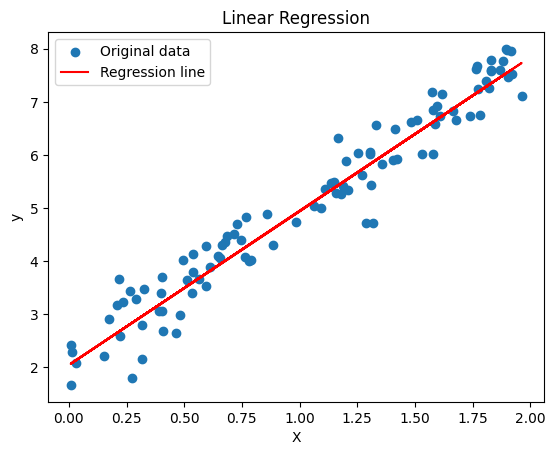

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
torch.manual_seed(42)
X = 2 * torch.rand(100, 1)  # Random input data
y = 3 * X + 2 + 0.5 * torch.randn(100, 1)  # Linear relation with noise

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X)

    # Compute the loss
    loss = criterion(predictions, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the original data and the learned regression line
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), model(X).detach().numpy(), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.show()

Now, let's print the weights and biases. In our case, we actually know what values these should take as we are considering a linear fit to synthetic data. Since we only have one feature (X), we have one weight, and we know that this weight should be 3 (why?). Moreover, we know that the bias should be 2 (why?). As you can see, our fit closely recovers the ground truth.

In [ ]:
print(model.linear.weight.data, model.linear.bias.data)

tensor([[2.9014]]) tensor([2.0385])


**Exercise 8**: Create your own example.

In [ ]:
#[INSERT YOUR CODE HERE]

## Save and load models

**Exercise 9**: Once you have created a model (be it a linear model or a deep neural network), you can save it to file. Later you can load it again. How do you do that in PyTorch?

## Logistic regression

As illustrated above with the linear fit to data, you can train other models, using PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
torch.manual_seed(42)
X_positive = torch.randn(100, 2) + torch.tensor([2, 2])
X_negative = torch.randn(100, 2) + torch.tensor([-2, -2])
X = torch.cat([X_positive, X_negative], dim=0)
y = torch.cat([torch.ones(100), torch.zeros(100)])

# Shuffle the data
shuffle_indices = torch.randperm(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

# Define a simple logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Instantiate the model, loss function, and optimizer
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

**Exercise 10**: In logistic regression, we address a binary classification task. What is logistic regression? Explain the code above and plot the data to get an overview of the synthetic data set. Then train the model.

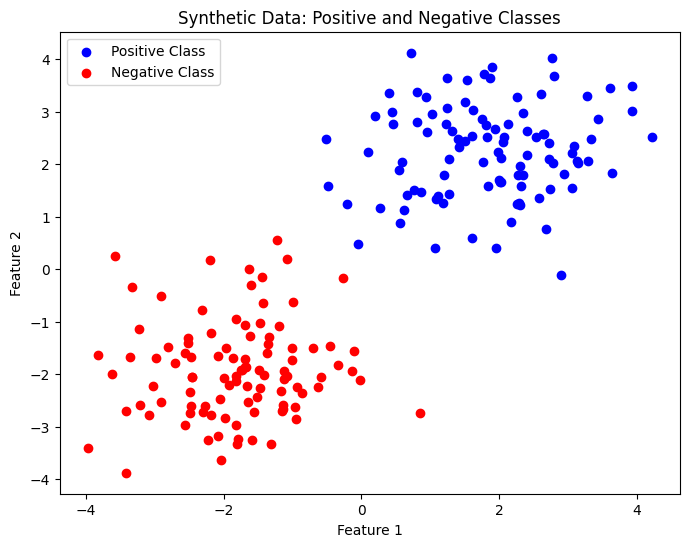

In [ ]:
# Plot the synthetic dataset to get an overview
plt.figure(figsize=(8, 6))
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='blue', label='Positive Class')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Negative Class')
plt.title('Synthetic Data: Positive and Negative Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Epoch [100/2000], Loss: 0.1937
Epoch [200/2000], Loss: 0.1147
Epoch [300/2000], Loss: 0.0847
Epoch [400/2000], Loss: 0.0686
Epoch [500/2000], Loss: 0.0585
Epoch [600/2000], Loss: 0.0515
Epoch [700/2000], Loss: 0.0463
Epoch [800/2000], Loss: 0.0423
Epoch [900/2000], Loss: 0.0391
Epoch [1000/2000], Loss: 0.0364
Epoch [1100/2000], Loss: 0.0342
Epoch [1200/2000], Loss: 0.0324
Epoch [1300/2000], Loss: 0.0307
Epoch [1400/2000], Loss: 0.0293
Epoch [1500/2000], Loss: 0.0281
Epoch [1600/2000], Loss: 0.0270
Epoch [1700/2000], Loss: 0.0260
Epoch [1800/2000], Loss: 0.0251
Epoch [1900/2000], Loss: 0.0242
Epoch [2000/2000], Loss: 0.0235
Accuracy: 1.0000


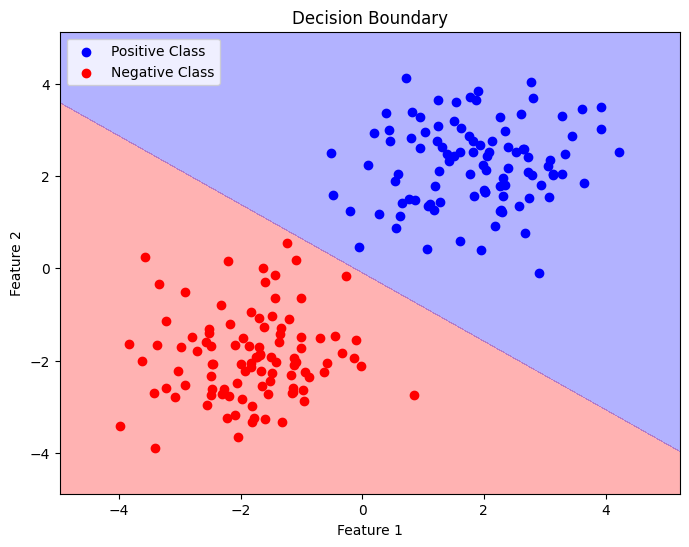

In [ ]:
import numpy as np
# Train the model and track the loss for the training curve
num_epochs = 2000

losses = []  # List to store the loss at each epoch

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X).squeeze()
    loss = criterion(outputs, y)

    # Zero the gradients, backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the loss for plotting later
    losses.append(loss.item())

    # Print the loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Final model performance
with torch.no_grad():
    predicted = model(X).squeeze()
    predicted = predicted.round()  # Convert probabilities to 0 or 1
    accuracy = (predicted == y).float().mean()
    print(f'Accuracy: {accuracy:.4f}')

# Plot the decision boundary
# Step 1: create a mesh grid to evaluate the model's decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))

# Convert the grid to a tensor
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Now pass to model
with torch.no_grad():
    preds = model(grid).squeeze().numpy()

preds = preds.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# The decision boundary (whether we think that the correct label is 0 or 1) is at 0.5
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='blue', label='Positive Class')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Negative Class')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

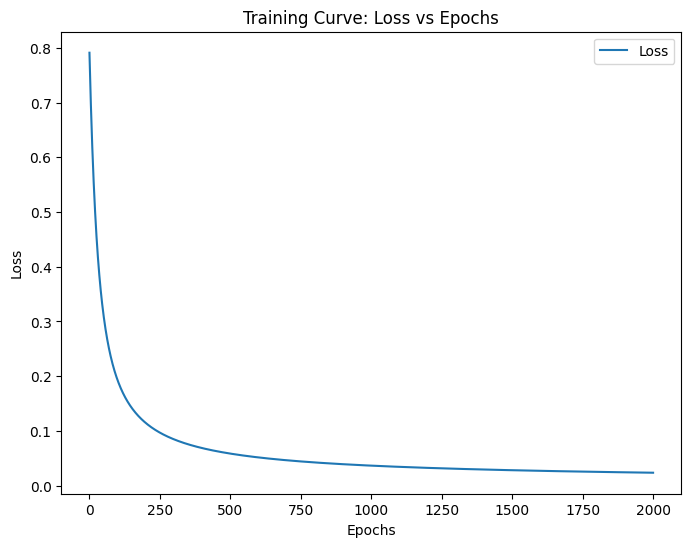

In [ ]:
# Plot the training curve (Loss vs. Epochs)
plt.figure(figsize=(8, 6))
plt.plot(losses, label='Loss')
plt.title('Training Curve: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Exercise 11**: Modify the synthetic data generation to introduce class imbalance (e.g., 80% negative samples and 20% positive samples). Retrain the logistic regression model and observe its performance. How do you deal with imbalanced data?

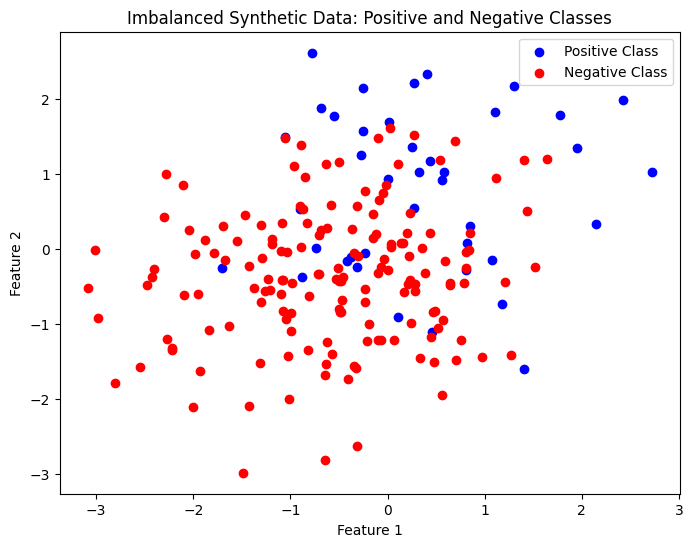

Epoch [100/1000], Loss: 0.9870
Epoch [200/1000], Loss: 0.8791
Epoch [300/1000], Loss: 0.8344
Epoch [400/1000], Loss: 0.8128
Epoch [500/1000], Loss: 0.8013
Epoch [600/1000], Loss: 0.7948
Epoch [700/1000], Loss: 0.7910
Epoch [800/1000], Loss: 0.7887
Epoch [900/1000], Loss: 0.7872
Epoch [1000/1000], Loss: 0.7863
Accuracy: 0.2320


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Modify the synthetic data to introduce class imbalance
torch.manual_seed(42)

# 80% negative (class 0) and 20% positive (class 1) samples
num_positive = 40  # 20% positive class
num_negative = 160  # 80% negative class

X_positive = torch.randn(num_positive, 2) + torch.tensor([0.5, 0.5])
X_negative = torch.randn(num_negative, 2) + torch.tensor([-0.5, -0.5])

X = torch.cat([X_positive, X_negative], dim=0)
y = torch.cat([torch.ones(num_positive), torch.zeros(num_negative)])

# Shuffle the data
shuffle_indices = torch.randperm(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x) # Raw output (logits), not sigmoid

# Instantiate the model, loss function, and optimizer
model = LogisticRegression()

# One solution to the problem that imballanced data presents is to give higher weight for the minority class.
# Note, we changed the loss function here.
class_weights = torch.tensor([4.]).float()  # Higher weight for positive class
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)

# Reshape the target labels to match the shape of the predictions
y = y.view(-1, 1)

optimizer = optim.SGD(model.parameters(), lr=0.01)

# Plot the imbalanced synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='blue', label='Positive Class')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Negative Class')
plt.title('Imbalanced Synthetic Data: Positive and Negative Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Train the model on the imbalanced data
num_epochs =1000
losses = []  # List to store the loss at each epoch

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Zero the gradients, backward pass, and update weights
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    # Store the loss for plotting later
    losses.append(loss.item())

    # Print the loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Final model performance
with torch.no_grad():
    predicted = model(X).squeeze()
    predicted = predicted.round()  # Convert probabilities to 0 or 1
    accuracy = (predicted == y).float().mean()
    print(f'Accuracy: {accuracy:.4f}')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    # Compute logits for the grid
    logits = model(grid)
    # Apply sigmoid to convert logits to probabilities
    preds = torch.sigmoid(logits).squeeze().numpy()

preds = preds.reshape(xx.shape)

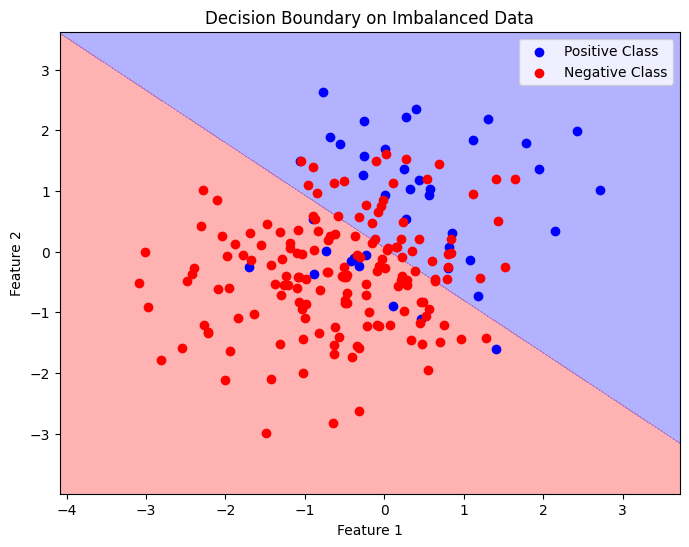

In [ ]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='blue', label='Positive Class')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Negative Class')
plt.title('Decision Boundary on Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

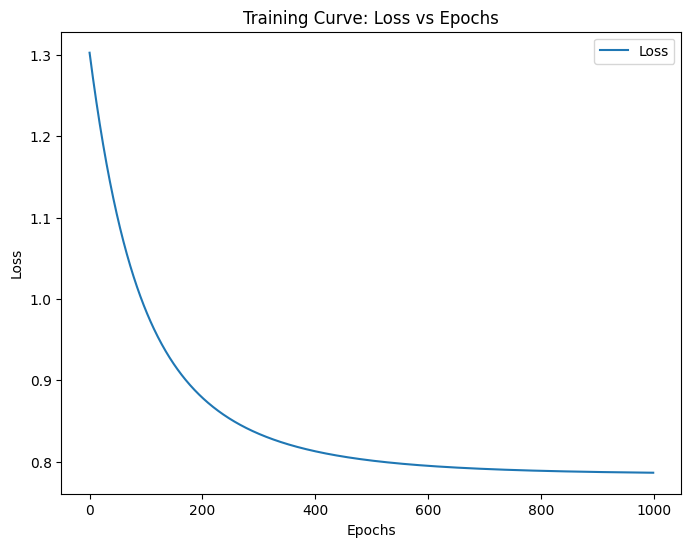

In [ ]:
# Plot the training curve (Loss vs. Epochs)
plt.figure(figsize=(8, 6))
plt.plot(losses, label='Loss')
plt.title('Training Curve: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Custom loss function

Rather than using an existing loss function, you can create your own.

In [ ]:
import torch
import torch.nn as nn

# Custom Loss Function
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, predictions, targets):
        # Custom loss computation
        loss = torch.mean((predictions - targets)**2)
        return loss

**Exercise 12**: The loss function above is just the MSE. Use the custom loss function for linear regression.

Epoch [100/300], Loss: 0.3310
Epoch [200/300], Loss: 0.1975
Epoch [300/300], Loss: 0.1951


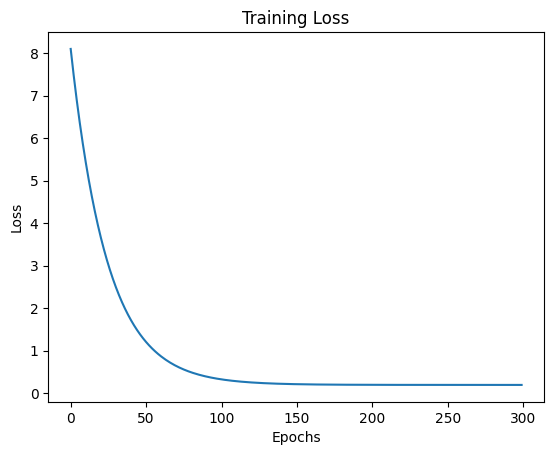

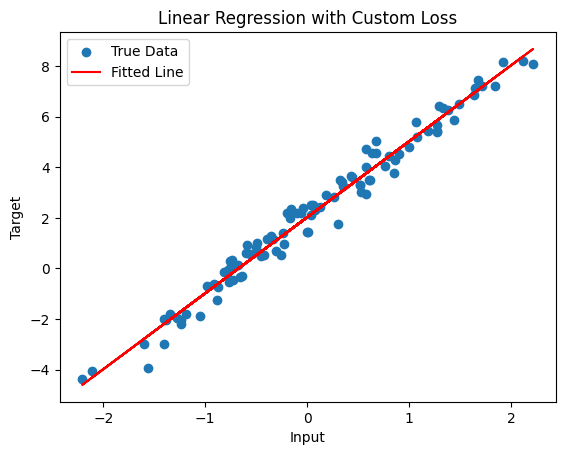

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, custom loss, and optimizer
model = LinearRegressionModel()
criterion = CustomLoss()  # Using the custom loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Generate synthetic data
torch.manual_seed(42)
inputs = torch.randn(100, 1)
targets = 3 * inputs + 2 + 0.5 * torch.randn(100, 1)

# Training loop
epochs = 300
losses = []

for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    predictions = model(inputs)

    # Compute loss
    loss = criterion(predictions, targets)
    losses.append(loss.item())

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotting the training loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Plotting the results of the regression
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predicted = model(inputs)

plt.scatter(inputs.numpy(), targets.numpy(), label='True Data')
plt.plot(inputs.numpy(), predicted.numpy(), label='Fitted Line', color='red')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression with Custom Loss')
plt.show()

**Exercise 13**: Explore the homepage of PyTorch and the Kaggle. Find at least three useful examples and references on Deep Neural Networks (with fully connected layers) and computer vision that you have not been pointed to in these notebooks and discuss them in the group.

**Exercise 14**: Discuss the content of today's lecture and the notebooks. What are the main concepts to take home? Are there any aspects (of the content or PyThon programming) that you feel you need to dive further into before watching the next lecture? Discuss in the group.

**Exercise 15**: Can you, so far, see any applications of the concepts presented in this course to your research?

**Exercise 16**: In the event that your group has finished all exercises in notebooks 1.1, 1.2, and 1.3 within the first tutorial and you still have time left, please go to exercises 14 and 15 in notebook 3.2.